In [1]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

btc = fdr.DataReader('btc/usd', '2018')
print(btc)

              Close     Open     High      Low    Volume  Change
Date                                                            
2018-01-01  13444.9  13850.5  13921.5  12877.7   78430.0 -0.0293
2018-01-02  14754.1  13444.9  15306.1  12934.2  137730.0  0.0974
2018-01-03  15156.6  14754.1  15435.0  14579.7  106540.0  0.0273
2018-01-04  15180.1  15156.5  15408.7  14244.7  110970.0  0.0015
2018-01-05  16954.8  15180.1  17126.9  14832.4  141960.0  0.1169
...             ...      ...      ...      ...       ...     ...
2021-11-07  63273.2  61483.8  63273.2  61347.2   34340.0  0.0291
2021-11-08  67527.9  63276.4  67763.3  63276.4   81080.0  0.0672
2021-11-09  66904.4  67528.7  68493.3  66334.9   66130.0 -0.0092
2021-11-10  64932.6  66942.6  68990.6  62951.3   96210.0 -0.0295
2021-11-11  64775.1  64922.8  65583.3  64121.9   91850.0 -0.0024

[1411 rows x 6 columns]


In [2]:
from sklearn.preprocessing import MinMaxScaler

values = btc[['Close']]

scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(values)

In [3]:
size = 200
train = scaled[:-size]
test = scaled[-size:]

In [4]:
def sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = sample(train, 30)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(X_train.shape[1], 1),
               activation='tanh',
               return_sequences=False)
         )
model.add(Dense(1))

In [6]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size = 16)

Epoch 1/100
74/74 [==============================] - 2s 9ms/step - loss: 0.0085
Epoch 2/100
74/74 [==============================] - 1s 9ms/step - loss: 6.9403e-04
Epoch 3/100
74/74 [==============================] - 1s 8ms/step - loss: 6.2501e-04
Epoch 4/100
74/74 [==============================] - 1s 8ms/step - loss: 5.6232e-04
Epoch 5/100
74/74 [==============================] - 1s 9ms/step - loss: 5.6716e-04
Epoch 6/100
74/74 [==============================] - 1s 9ms/step - loss: 5.3940e-04
Epoch 7/100
74/74 [==============================] - 1s 9ms/step - loss: 5.2339e-04
Epoch 8/100
74/74 [==============================] - 1s 9ms/step - loss: 5.0280e-04
Epoch 9/100
74/74 [==============================] - 1s 9ms/step - loss: 4.8072e-04
Epoch 10/100
74/74 [==============================] - 1s 9ms/step - loss: 4.6938e-04
Epoch 11/100
74/74 [==============================] - 1s 9ms/step - loss: 4.3288e-04
Epoch 12/100
74/74 [==============================] - 1s 9ms/step - loss: 4.11

74/74 [==============================] - 1s 9ms/step - loss: 1.4184e-04
Epoch 98/100
74/74 [==============================] - 1s 10ms/step - loss: 1.4950e-04
Epoch 99/100
74/74 [==============================] - 1s 8ms/step - loss: 1.4425e-04
Epoch 100/100
74/74 [==============================] - 1s 9ms/step - loss: 1.3876e-04


In [7]:
X_test, y_test = sample(test, 30)
pred = model.predict(X_test)

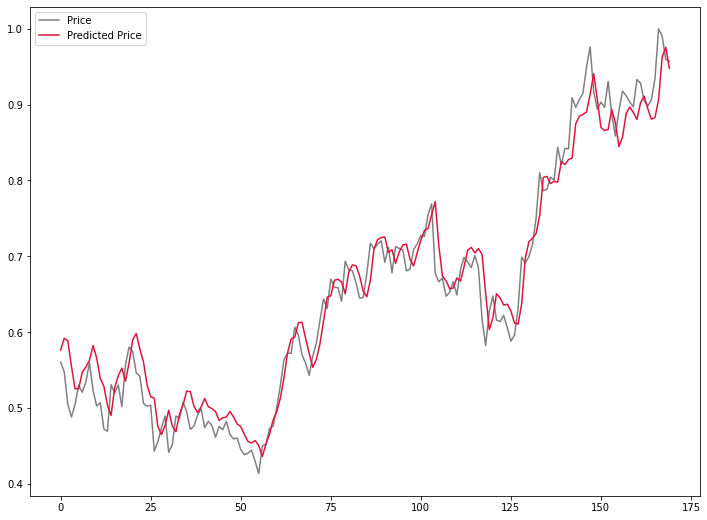

In [8]:
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='Price', color='gray')
plt.plot(pred, label='Predicted Price', color='crimson')
plt.legend()
plt.show()